# Bank Marketing Dataset

In [24]:
# importing required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score,accuracy_score,recall_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures


In [25]:
#Reading Preprocessed data. First column is deleted because its index and redundant
df=pd.read_csv("/kaggle/input/bank-marketing/PreprocessedBank.csv").drop(['Unnamed: 0'],axis=1)

In [26]:
#dispaly first 5 rows
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,jun,mar,may,nov,oct,sep,failure,success,unknown,deposit
0,59,1,2343,0,1,5,1042,1,-1,0,...,0,0,1,0,0,0,0,0,1,1
1,56,1,45,1,1,5,1467,1,-1,0,...,0,0,1,0,0,0,0,0,1,1
2,41,1,1270,0,1,5,1389,1,-1,0,...,0,0,1,0,0,0,0,0,1,1
3,55,1,2476,0,1,5,579,1,-1,0,...,0,0,1,0,0,0,0,0,1,1
4,54,1,184,1,1,5,673,2,-1,0,...,0,0,1,0,0,0,0,0,1,1


In [27]:
df.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'married', 'single', 'primary',
       'secondary', 'tertiary', 'admin.', 'blue-collar', 'entrepreneur',
       'housemaid', 'management', 'retired', 'self-employed', 'services',
       'student', 'technician', 'unemployed', 'cellular', 'telephone', 'apr',
       'aug', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep',
       'failure', 'success', 'unknown', 'deposit'],
      dtype='object')

In [28]:
#Standardisation of Data
scaler=StandardScaler()
scaler.fit(df.drop('deposit',axis=1))
scaled_features=scaler.transform(df.drop('deposit',axis=1))
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,jul,jun,mar,may,nov,oct,sep,failure,success,unknown
0,1.49,0.12,0.25,-1.06,0.39,-1.27,1.93,-0.55,-0.48,-0.36,...,-0.40,-0.35,-0.16,1.72,-0.30,-0.19,-0.17,-0.35,-0.33,0.58
1,1.24,0.12,-0.46,0.95,0.39,-1.27,3.15,-0.55,-0.48,-0.36,...,-0.40,-0.35,-0.16,1.72,-0.30,-0.19,-0.17,-0.35,-0.33,0.58
2,-0.02,0.12,-0.08,-1.06,0.39,-1.27,2.93,-0.55,-0.48,-0.36,...,-0.40,-0.35,-0.16,1.72,-0.30,-0.19,-0.17,-0.35,-0.33,0.58
3,1.16,0.12,0.29,-1.06,0.39,-1.27,0.60,-0.55,-0.48,-0.36,...,-0.40,-0.35,-0.16,1.72,-0.30,-0.19,-0.17,-0.35,-0.33,0.58
4,1.07,0.12,-0.42,0.95,0.39,-1.27,0.87,-0.19,-0.48,-0.36,...,-0.40,-0.35,-0.16,1.72,-0.30,-0.19,-0.17,-0.35,-0.33,0.58


In [29]:
df_feat.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'married', 'single', 'primary',
       'secondary', 'tertiary', 'admin.', 'blue-collar', 'entrepreneur',
       'housemaid', 'management', 'retired', 'self-employed', 'services',
       'student', 'technician', 'unemployed', 'cellular', 'telephone', 'apr',
       'aug', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep',
       'failure', 'success', 'unknown'],
      dtype='object')

**Notes :** 
1. Algorithms like KNN, Naive bayes, Logistic Regression and SVM require Standardised Data
2. Tree based Algorithms are scale independant
3. standardisation basically subtracts mean and divides std deviation of column from each value

In [8]:
!pip install lazypredict

from lazypredict.Supervised import LazyClassifier


In [30]:
X = df_feat  # Features
y = df['deposit']  # Target variable

# Splitting the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Train Test Split

In [31]:
print("Size of X_train:", len(X_train))
print("Size of Y_train:", len(y_train))

Size of X_train: 7813
Size of Y_train: 7813


**LazyPredict**

In [32]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

 97%|█████████▋| 28/29 [00:34<00:00,  1.14it/s]

[LightGBM] [Info] Number of positive: 3682, number of negative: 4131
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003788 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1025
[LightGBM] [Info] Number of data points in the train set: 7813, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.471266 -> initscore=-0.115063
[LightGBM] [Info] Start training from score -0.115063


100%|██████████| 29/29 [00:34<00:00,  1.18s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.85,0.85,0.85,0.85,0.33
XGBClassifier,0.85,0.85,0.85,0.85,0.45
RandomForestClassifier,0.85,0.85,0.85,0.85,1.54
SVC,0.84,0.84,0.84,0.84,3.54
NuSVC,0.84,0.84,0.84,0.84,5.03
BaggingClassifier,0.83,0.83,0.83,0.83,0.55
ExtraTreesClassifier,0.83,0.83,0.83,0.83,1.48
LogisticRegression,0.82,0.82,0.82,0.82,0.31
AdaBoostClassifier,0.82,0.82,0.82,0.82,0.60


**LGBM**

In [36]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, classification_report, recall_score

lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
pred = lgbm.predict(X_test)
accLGBM = accuracy_score(y_test, pred)
y_pred_prob = lgbm.predict_proba(X_test)
aucScoreLGBM = roc_auc_score(y_test,  y_pred_prob[:,1])
fprLGBM, tprLGBM, thresholds = roc_curve(y_test, y_pred_prob[:,1])
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print("AUC score for LGBM is ", aucScoreLGBM)
print("Test Accuracy score for LGBM is ", accLGBM)
predT = lgbm.predict(X_train)
print("Train Accuracy score for LGBM is ", accuracy_score(y_train, predT))
print("Recall score for LGBM is ", recall_score(y_test, pred))


[LightGBM] [Info] Number of positive: 3682, number of negative: 4131
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003816 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1025
[LightGBM] [Info] Number of data points in the train set: 7813, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.471266 -> initscore=-0.115063
[LightGBM] [Info] Start training from score -0.115063
[[1440  302]
 [ 191 1416]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1742
           1       0.82      0.88      0.85      1607

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349

AUC score for LGBM is  0.9264105017014397
Test Accuracy score for LGBM is  0.85279187817258

In [37]:
# Get the column names of the features in X_train
feature_names = scaler.get_feature_names_out(input_features=df.columns[:-1])

# Display the column names of the features in X_train
print(feature_names)

['age' 'default' 'balance' 'housing' 'loan' 'day' 'duration' 'campaign'
 'pdays' 'previous' 'married' 'single' 'primary' 'secondary' 'tertiary'
 'admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'cellular'
 'telephone' 'apr' 'aug' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct'
 'sep' 'failure' 'success' 'unknown']


**Feature importance using LGBM**

[LightGBM] [Info] Number of positive: 3682, number of negative: 4131
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003962 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1025
[LightGBM] [Info] Number of data points in the train set: 7813, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.471266 -> initscore=-0.115063
[LightGBM] [Info] Start training from score -0.115063


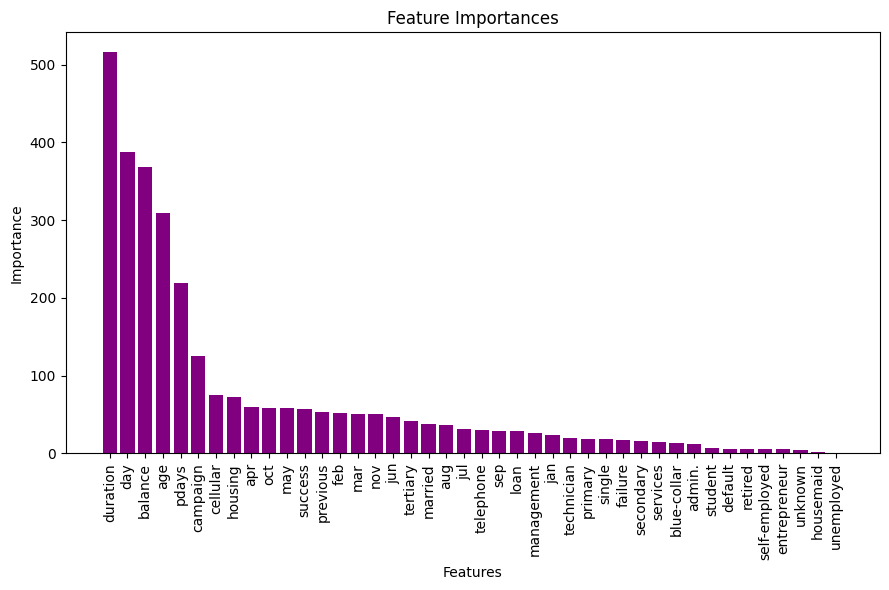

In [38]:
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt

lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)

# Getting feature importances
feature_importances = lgbm.feature_importances_

# Getting feature names
feature_names = scaler.get_feature_names_out(input_features=df.columns[:-1])

# Sorting indices by importance
sorted_indices = feature_importances.argsort()[::-1]

# Plotting feature importances
plt.figure(figsize=(9, 6))
bars = plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], color='purple')
plt.xticks(range(len(feature_importances)), feature_names[sorted_indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')

plt.tight_layout()
plt.show()


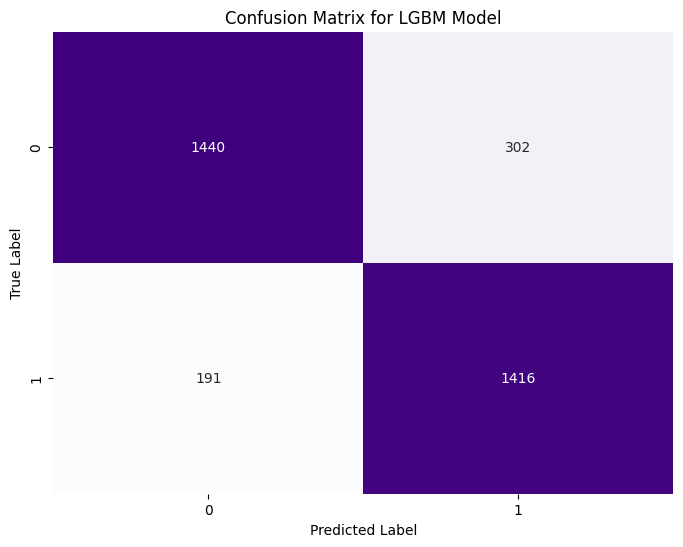

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate predictions on the test set
pred = lgbm.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", cbar=False)
plt.title('Confusion Matrix for LGBM Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


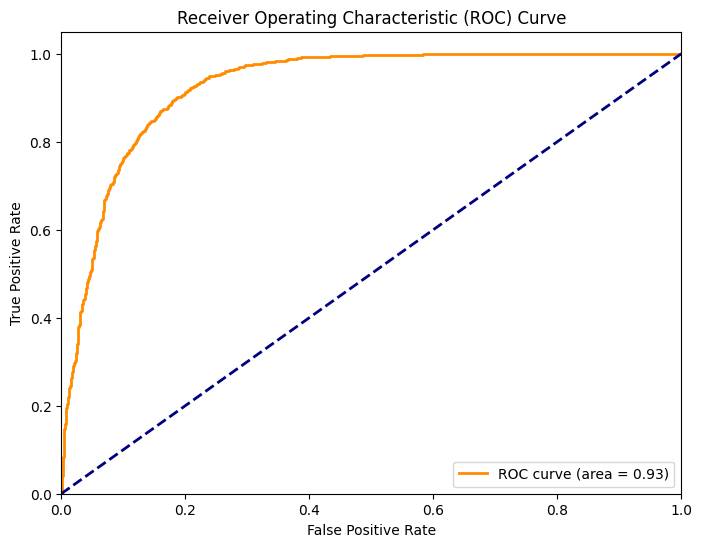

In [19]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for X_test
y_prob = lgbm.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

[LightGBM] [Info] Number of positive: 3682, number of negative: 4131
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1025
[LightGBM] [Info] Number of data points in the train set: 7813, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.471266 -> initscore=-0.115063
[LightGBM] [Info] Start training from score -0.115063


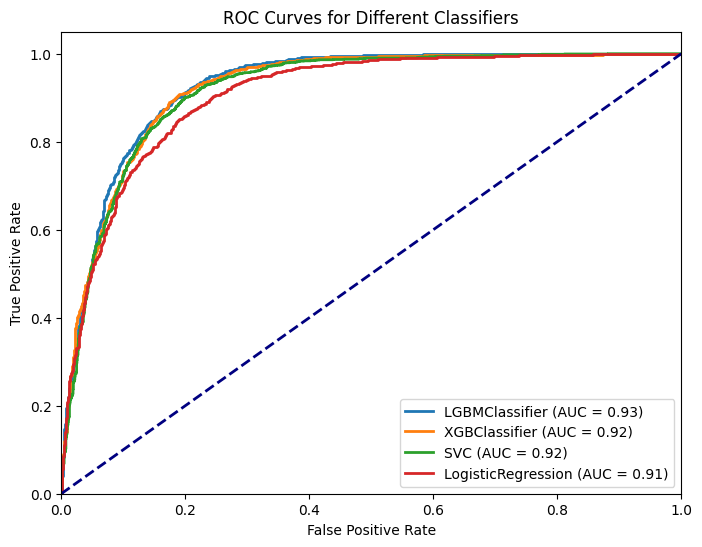

In [45]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Initialize classifiers
classifiers = {
    "LGBMClassifier": LGBMClassifier(),
    "XGBClassifier": XGBClassifier(),
    "SVC": SVC(probability=True),
    "LogisticRegression": LogisticRegression()
}

# Train each classifier and plot ROC curve
plt.figure(figsize=(8, 6))
for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_prob = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='%s (AUC = %0.2f)' % (clf_name, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Classifiers')
plt.legend(loc='lower right')
plt.show()
